# Examen Final

El examen final del curso es un ejercicio practico en el cual vamos a utilizar la base de datos del Consorcio Internacional de Taxonomía Molecular del Cáncer de Mama, realizar algunos analisis y tratar de generar un modelo de machine learning que pueda predecir si con determinadas variables es posible que el paciente sobreviva o no.

## Librerias
Vamos a utilizar las siguientes librerias, recordemos validar el ambiente de Anaconda que estamos utilizando

- Instalar la libreria  **scipy.stats** reiniciar el kernel y regresar aca

In [3]:
!pip install -U scikit-learn

In [2]:
## Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss


## Breast Cancer (METABRIC, Nature 2012 & Nat Commun 2016)




Origen del dataset (https://www.cbioportal.org/study/clinicalData?id=brca_metabric)

La base de datos del Consorcio Internacional de Taxonomía Molecular del Cáncer de Mama (METABRIC) es un proyecto Canadá-Reino Unido que contiene datos de secuenciación específica de 1980 muestras primarias de cáncer de mama. Los datos clínicos y genómicos se descargaron de cBioPortal.

El conjunto de datos fue recopilado por el profesor Carlos Caldas del Cambridge Research Institute y el profesor Sam Aparicio del British Columbia Cancer Center en Canadá y publicado en Nature Communications (Pereira et al., 2016). También apareció en varios artículos, incluidos Nature y otros:
- [Associations between genomic stratification of breast cancer and centrally reviewed tumor pathology in the METABRIC cohort](https://www.nature.com/articles/s41523-018-0056-8)
- [Predicting Outcomes of Hormone and Chemotherapy in the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) Study by Biochemically-inspired Machine Learning](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461908/)

## Desde CBioPortal:

- Clinical attributes in the dataset: 31 values
- Genetic attributes in the dataset: The genetics part of the dataset contains m-RNA levels z-score for 331 genes, and mutation for 175 genes.

### Genetic attributes in the dataset:

| Name                           | Type   | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ------------------------------ | ------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| patient_id                     | object | Patient ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| age_at_diagnosis               | float  | Age of the patient at diagnosis time                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| type_of_breast_surgery         | object | Breast cancer surgery type: 1- MASTECTOMY, which refers to a surgery to remove all breast tissue from a breast as a way to treat or prevent breast cancer. 2- BREAST CONSERVING, which refers to a urgery where only the part of the breast that has cancer is removed                                                                                                                                                                                                                             |
| cancer_type                    | object | Breast cancer types: 1- Breast Cancer or 2- Breast Sarcoma                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| cancer_type_detailed           | object | Detailed Breast cancer types: 1- Breast Invasive Ductal Carcinoma 2- Breast Mixed Ductal and Lobular Carcinoma 3- Breast Invasive Lobular Carcinoma 4- Breast Invasive Mixed Mucinous Carcinoma 5- Metaplastic Breast Cancer                                                                                                                                                                                                                                                                       |
| cellularity                    | object | Cancer cellularity post chemotherapy, which refers to the amount of tumor cells in the specimen and their arrangement into clusters                                                                                                                                                                                                                                                                                                                                                                |
| chemotherapy                   | int    | Whether or not the patient had chemotherapy as a treatment (yes/no)                                                                                                                                                                                                                                                                                                                                                                                                                                |
| pam50_+_claudin-low_subtype    | object | Pam 50: is a tumor profiling test that helps show whether some estrogen receptor-positive (ER-positive), HER2-negative breast cancers are likely to metastasize (when breast cancer spreads to other organs). The claudin-low breast cancer subtype is defined by gene expression characteristics, most prominently: Low expression of cell–cell adhesion genes, high expression of epithelial–mesenchymal transition (EMT) genes, and stem cell-like/less differentiated gene expression patterns |
| cohort                         | float  | Cohort is a group of subjects who share a defining characteristic (It takes a value from 1 to 5)                                                                                                                                                                                                                                                                                                                                                                                                   |
| er_status_measured_by_ihc      | float  | To assess if estrogen receptors are expressed on cancer cells by using immune-histochemistry (a dye used in pathology that targets specific antigen, if it is there, it will give a color, it is not there, the tissue on the slide will be colored) (positive/negative)                                                                                                                                                                                                                           |
| er_status                      | object | Cancer cells are positive or negative for estrogen receptors                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| neoplasm_histologic_grade      | int    | Determined by pathology by looking the nature of the cells, do they look aggressive or not (It takes a value from 1 to 3)                                                                                                                                                                                                                                                                                                                                                                          |
| her2_status_measured_by_snp6   | object | To assess if the cancer positive for HER2 or not by using advance molecular techniques (Type of next generation sequencing)                                                                                                                                                                                                                                                                                                                                                                        |
| her2_status                    | object | Whether the cancer is positive or negative for HER2                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| tumor_other_histologic_subtype | object | Type of the cancer based on microscopic examination of the cancer tissue (It takes a value of 'Ductal/NST', 'Mixed', 'Lobular', 'Tubular/ cribriform', 'Mucinous', 'Medullary', 'Other', 'Metaplastic' )                                                                                                                                                                                                                                                                                           |
| hormone_therapy                | int    | Whether or not the patient had hormonal as a treatment (yes/no)                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| inferred_menopausal_state      | object | Whether the patient is is post menopausal or not (post/pre)                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| integrative_cluster            | object | Molecular subtype of the cancer based on some gene expression (It takes a value from '4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6')                                                                                                                                                                                                                                                                                                                                                 |
| primary_tumor_laterality       | object | Whether it is involving the right breast or the left breast                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| lymph_nodes_examined_positive  | float  | To take samples of the lymph node during the surgery and see if there were involved by the cancer                                                                                                                                                                                                                                                                                                                                                                                                  |
| mutation_count                 | float  | Number of gene that has relevant mutations                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| nottingham_prognostic_index    | float  | It is used to determine prognosis following surgery for breast cancer. Its value is calculated using three pathological criteria: the size of the tumour; the number of involved lymph nodes; and the grade of the tumour.                                                                                                                                                                                                                                                                         |
| oncotree_code                  | object | The OncoTree is an open-source ontology that was developed at Memorial Sloan Kettering Cancer Center (MSK) for standardizing cancer type diagnosis from a clinical perspective by assigning each diagnosis a unique OncoTree code.                                                                                                                                                                                                                                                                 |
| overall_survival_months        | float  | Duration from the time of the intervention to death                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| overall_survival               | object | Target variable wether the patient is alive of dead.                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| pr_status                      | object | Cancer cells are positive or negative for progesterone receptors                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| radio_therapy                  | int    | Whether or not the patient had radio as a treatment (yes/no)                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| 3-gene_classifier_subtype      | object | Three Gene classifier subtype It takes a value from 'ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif','HER2+'                                                                                                                                                                                                                                                                                                                                                                      |
| tumor_size                     | float  | Tumor size measured by imaging techniques                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| tumor_stage                    | float  | Stage of the cancer based on the involvement of surrounding structures, lymph nodes and distant spread                                                                                                                                                                                                                                                                                                                                                                                             |
| death_from_cancer              | int    | Wether the patient's death was due to cancer or not (yes/no)                                                                                                                                                                                                                                                                                                                                                                                                                                       |


### Genetic attributes in the dataset:
The genetics part of the dataset contains m-RNA levels z-score for 331 genes, and mutation for 175 genes.

#### What are mRNA?
The DNA molecules attached to each slide act as probes to detect gene expression, which is also known as the transcriptome or the set of messenger RNA (mRNA) transcripts expressed by a group of genes. To perform a microarray analysis, mRNA molecules are typically collected from both an experimental sample and a reference sample.

#### What are mRNA Z-Scores?
For mRNA expression data, The calculations of the relative expression of an individual gene and tumor to the gene's expression distribution in a reference population is done. That reference population is all samples in the study . The returned value indicates the number of standard deviations away from the mean of expression in the reference population (Z-score). This measure is useful to determine whether a gene is up- or down-regulated relative to the normal samples or all other tumor samples.

The formula is :
```
z = (expression in tumor sample - mean expression in reference sample) / standard deviation of expression in reference sample
```

## 1) Exploratory Data Analysis (EDA)

### Cargando la data

In [4]:
data = pd.read_csv("METABRIC_RNA_Mutation.csv")

C:\Users\aleja\AppData\Local\Temp\ipykernel_16068\371503695.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("METABRIC_RNA_Mutation.csv")


Dimensiones del data set, utilizamos la funcion shape(<filas>, <columnas>)
    
>  **Pregunta Examen**: Imprime las dimenciones del dataset **Respuesta:** filas 1904 columnas 693

In [5]:
# tu codigo aqui:
data.shape

(1904, 693)

In [7]:
## head()
data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


### Explorando la data clinica
En las siguientes celdas vamops a generar el data frame da pandas `data_clinica`, este dataset contiene unicamente las variables clinicas de el dataset. A lo largo de el examen vamos a utilizar el dataset.

In [8]:
columnas_data_clinica = data.columns[:31]
print(columnas_data_clinica)

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')


In [9]:
data_clinica = data[columnas_data_clinica].copy()

In [10]:
data_clinica.shape

(1904, 31)

In [11]:
data_clinica.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


#### info()
Imprime un listado de columnas, cuantos valores no nulos contiene y el tipo de objeto

In [12]:
data_clinica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

#### describe()
Estadistica descriptiva de los valos numericos en el dataframe

In [13]:
data_clinica.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000,1403.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.420693,0.597164,26.238726,1.750535
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,0.493800,0.490597,15.160976,0.628999
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,0.000000,0.000000,17.000000,1.000000
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,0.000000,1.000000,23.000000,2.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,1.000000,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000


## Columnas
Extraemos a una lista los nombres de las columnas en el dataset de data_clinica, ya que nos va a servir mas adelante

In [14]:
columnas = data_clinica.columns.tolist()
print(columnas)

['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'oncotree_code', 'overall_survival_months', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_size', 'tumor_stage', 'death_from_cancer']


## Variable Objetivo

Esta es la variable que vamos a predecir

In [15]:
data_clinica['overall_survival'].unique()

array([1, 0], dtype=int64)

## Variables Categoricas

Vamos a buscar en el dataset clinico las columnas categoricas, las que no contien data numerica. El objetivo es trasnformar estas variables para utilizarlas en los experimentos.

Para esto vamos a buscar por el tipo de dato, las variables de tipo `object` son las variables que estamos buscando.
Las columnas de tipo `int`o `float` son numericas.
En pandas para obtener las columnas de determinado o determinados tipo de datos utilizamos la función [select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)

In [17]:
columnas_categoricas = data_clinica.select_dtypes("object").columns

In [18]:
print(columnas_categoricas)

Index(['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed',
       'cellularity', 'pam50_+_claudin-low_subtype',
       'er_status_measured_by_ihc', 'er_status',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'inferred_menopausal_state',
       'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code',
       'pr_status', '3-gene_classifier_subtype', 'death_from_cancer'],
      dtype='object')


Exploremos los valores de las variables categoricas, para ver los valores unicos podemos utilizar la funcion de pandas `unique`.

Ejemplo: 

In [19]:
data_clinica['type_of_breast_surgery'].unique()

array(['MASTECTOMY', 'BREAST CONSERVING', nan], dtype=object)

>  **Pregunta Examen**: Utilizando un ciclo for exploremos los valores unicos de todas las variables categoricas, recordemos que las almacenamos en la lista `columnas_categoricas`.

TIP: el codifo en los f-strings va adentro de `{ }`

In [29]:
for col in columnas_categoricas:
    print(f"==== Columna: {col} =====") ## tu codigo aqui {}
    print(f"> Valores Unicos: {data_clinica[col].unique()} \n") ## tu codigo aqui {}

==== Columna: type_of_breast_surgery =====
> Valores Unicos: ['MASTECTOMY' 'BREAST CONSERVING' nan] 

==== Columna: cancer_type =====
> Valores Unicos: ['Breast Cancer' 'Breast Sarcoma'] 

==== Columna: cancer_type_detailed =====
> Valores Unicos: ['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Breast' nan
 'Metaplastic Breast Cancer'] 

==== Columna: cellularity =====
> Valores Unicos: [nan 'High' 'Moderate' 'Low'] 

==== Columna: pam50_+_claudin-low_subtype =====
> Valores Unicos: ['claudin-low' 'LumA' 'LumB' 'Her2' 'Normal' 'Basal' 'NC'] 

==== Columna: er_status_measured_by_ihc =====
> Valores Unicos: ['Positve' 'Negative' nan] 

==== Columna: er_status =====
> Valores Unicos: ['Positive' 'Negative'] 

==== Columna: her2_status_measured_by_snp6 =====
> Valores Unicos: ['NEUTRAL' 'LOSS' 'GAIN' 'UNDEF'] 

==== Columna: her2_status =====
> Valores Unicos: ['Negative' 'Pos

## Correlación Variables Categoricas
Necesitamos medir la dependencia entre las variables categoricas, para seleccionar las que tengar mayor importancia con nuestra variable objetivo. 

Para esto vamos a correr el test de Chi Cuadrado $\chi^{2}$, la prueba de independencia de chi-cuadrado prueba la asociación entre dos variables categóricas. En Python para correr el test de Chi Cuadrado, vamos a utilizar la libreria **scipy**(Scientific Python).
El test de Chi Cuadrado necesita que le enviemos una tabla de contingencia de las variables categoricas, a tabla de contingencia contiene los efectivos conjuntos de los pares de modalidades o de los pares de clases.
Ejemplo de una tabla de contingencia:

| overall_survival	<br>  type_of_breast_surgery   | 0 | 1 |
|------------------------|---|---| 
| BREAST CONSERVING	     |351|404|
| MASTECTOMY	         |738|389|

Para crear esta table de contigencia podemos utilizar la función de pandas [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

Ejemplo:

In [17]:
pd.crosstab(index = data_clinica['type_of_breast_surgery'], columns = data_clinica['overall_survival'])

overall_survival,0,1
type_of_breast_surgery,,
BREAST CONSERVING,351,404
MASTECTOMY,738,389


>  **Pregunta Examen**: Leer la documentacion y explicar porque utilizamos en el parametro **index** la variable categorica y en el parametro **columns** la variable objetivo


**Respuesta**: La tabla cruzada nos permite visualizar la frecuencia conjunta de las categorías de dos variables categóricas. Al organizar la información de esta manera, podemos identificar patrones y relaciones entre las variables.

Calculemos Chi-cuadrado $\chi^{2}$  de contingencia o independencia para cada variable categorica

Las hipótesis contrastadas en la prueba son:
- Hipótesis nula: X e Y son independientes.
- Hipótesis alternativa: X e Y no son independientes


> **Existe una relación entre dos variables si el valor el p-value ≤ **0.05**.** 

Al inicio del notebook importamos el modulo de estadistica de Scipy con el alias de **ss**
```Python
import scipy.stats as ss
```
Vamos a utilizar la funcion **chi2_contingency** de este modulo para hacer el calculo.

In [30]:
type({123.1})

set

In [49]:
tbl_contingencia = pd.crosstab(index = data_clinica['type_of_breast_surgery'], columns = data_clinica['overall_survival'])

resultado = ss.chi2_contingency(tbl_contingencia)
print(resultado)

## Accedemos al p-value
print(f"p-value: resultado[1]")

Chi2ContingencyResult(statistic=66.11927513072783, pvalue=4.2444467466555877e-16, dof=1, expected_freq=array([[436.87300744, 318.12699256],
       [652.12699256, 474.87300744]]))
p-value: resultado[1]


Logramos obtener el p-value de la prueba $\chi^{2}$ de independencia, realicemos este calculo para todas las variables categoricas.
Vamos calcular los p-values en un ciclo **for** y en cada iteración vamos a guardar el resultado en una lista llamada **resultados**.

>  **Pregunta Examen**: Completa el codigo a continuación, unicamente donde veas `>>Tu codigo aqui`, los comentarios indican que hace el codigo:

In [55]:
resultados = [] ## Creamos una lista vacia

for variable in columnas_categoricas:
    ## Calculamos la tabla de contingencia:
    tbl_contingencia = pd.crosstab(index = data_clinica[variable], columns = data_clinica['overall_survival'])
    ## Test de chi cuadrado:
    resultado_test = ss.chi2_contingency(tbl_contingencia)
    
    ## Extrae el p-value, se encuentra en el indice 1 del resultado >>Tu codigo aqui:
    pvalue = resultado_test[1]
    
    ##Agregamos a la lista
    resultados.append((variable, pvalue))
    

>  **Pregunta Examen**: El objeto que agremos a la lista de resutados es una Tupla, ¿Que son las tuplas en Python? ¿Son objetos inmutables?
¿Que significa que sean inmutables?

**Respuesta**: Las tuplas en Python son como contenedores que permiten guardar varios elementos de distintos tipos en una única variable. A diferencia de las listas, las tuplas no se pueden modificar después de crearlas, lo que las hace inmutables

In [56]:
print(resultados)

[('type_of_breast_surgery', 4.2444467466555877e-16), ('cancer_type', 0.8723381021113059), ('cancer_type_detailed', 0.04860927228804105), ('cellularity', 0.3790023839997118), ('pam50_+_claudin-low_subtype', 1.2757357429268846e-08), ('er_status_measured_by_ihc', 0.3849523098061889), ('er_status', 0.42380135873577507), ('her2_status_measured_by_snp6', 0.22355588494404108), ('her2_status', 0.1681127339537874), ('tumor_other_histologic_subtype', 0.009446056829095202), ('inferred_menopausal_state', 1.3470659152891998e-13), ('integrative_cluster', 5.056393212521306e-06), ('primary_tumor_laterality', 0.057851298371032756), ('oncotree_code', 0.04860927228804105), ('pr_status', 0.3513231583914841), ('3-gene_classifier_subtype', 1.4937322991327923e-06), ('death_from_cancer', 0.0)]


In [57]:
## Convertimos la lista de resultados a un dataframe de Pandas
chi_test_output = pd.DataFrame(resultados, columns = ['variable', 'p-value'])
chi_test_output

,variable,p-value
0,type_of_breast_surgery,4.244447e-16
1,cancer_type,8.723381e-01
2,cancer_type_detailed,4.860927e-02
3,cellularity,3.790024e-01
4,pam50_+_claudin-low_subtype,1.275736e-08
5,er_status_measured_by_ihc,3.849523e-01
6,er_status,4.238014e-01
7,her2_status_measured_by_snp6,2.235559e-01
8,her2_status,1.681127e-01
9,tumor_other_histologic_subtype,9.446057e-03


Ahora hay que validar si aceptamos o rechazamos la hipotsis
**Existe una relación entre dos variables si el valor el p-value ≤ **0.05**.** 

Podemos utilizar condicionales en Pandas, ejemplos

In [58]:
chi_test_output['p-value']>= 0.05

0     False
1      True
2     False
3      True
4     False
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12     True
13    False
14     True
15    False
16    False
Name: p-value, dtype: bool

Que paso en el codigo anterior???? 

Se realizo la operación condicional en cada fila esto nos retorna un objeto Series de pandas con valores de verdadero donde se cumple la condición. Si pasamos esta Serie al operador `[]` del dataframe, creamos un filtro en el dataframe:


In [67]:
filtro = chi_test_output['p-value'] >= 0.05
chi_test_output[filtro]

,variable,p-value
1,cancer_type,0.872338
3,cellularity,0.379002
5,er_status_measured_by_ihc,0.384952
6,er_status,0.423801
7,her2_status_measured_by_snp6,0.223556
8,her2_status,0.168113
12,primary_tumor_laterality,0.057851
14,pr_status,0.351323


Podemos ver que ahora solo tenemos solo 8 variables que cumplen la condición, la operacion condicional tambien se puede aplicar directo en el dataframe:

In [69]:
chi_test_output[chi_test_output['p-value'] >= 0.05]

,variable,p-value
1,cancer_type,0.872338
3,cellularity,0.379002
5,er_status_measured_by_ihc,0.384952
6,er_status,0.423801
7,her2_status_measured_by_snp6,0.223556
8,her2_status,0.168113
12,primary_tumor_laterality,0.057851
14,pr_status,0.351323


Ordenemos las variables utilizando la función [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values).

Ya identificamos las variables categoricas mas utiles para el modelo.

In [70]:
chi_test_output[chi_test_output['p-value'] >= 0.05].sort_values('p-value', ascending=False)

,variable,p-value
1,cancer_type,0.872338
6,er_status,0.423801
5,er_status_measured_by_ihc,0.384952
3,cellularity,0.379002
14,pr_status,0.351323
7,her2_status_measured_by_snp6,0.223556
8,her2_status,0.168113
12,primary_tumor_laterality,0.057851


>  **Pregunta Examen**: Para que se utiliza el parametro `ascending`

**Respuesta**: se utiliza para controlar el orden en el que se presentan o procesan los datos, ya sea en orden numérico, gráficos o funciones de agregación en este caso de mayor a menor

## Variables Numericas

Antes de trabajar con las variables numerica vamos a eliminar columnas que no sirven para el modelo:
- identificador del paciente: `patient_id`
- `overall_survival_months` para este modelo nos causa ruido saber cuando tiempo vivio despues del tratamiento ya que el objetivo es predecir si sobrevive o no, existen otros modelos para calcular el tiempo.

In [72]:
data_clinica.drop(columns=['patient_id', 'overall_survival_months'], inplace=True)

KeyError: "['patient_id', 'overall_survival_months'] not found in axis"

>  **Pregunta Examen**: Para que se utiliza el parametro `inplace`

**Respuesta**: se refiere a si los cambios se aplican directamente al objeto original o si se crea una copia modificada.

Eliminamos columnas, recordemos actualizar nuestra lista de columnas

In [95]:
data_clinica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   type_of_breast_surgery          1882 non-null   object 
 2   cancer_type                     1904 non-null   object 
 3   cancer_type_detailed            1889 non-null   object 
 4   cellularity                     1850 non-null   object 
 5   chemotherapy                    1904 non-null   int64  
 6   pam50_+_claudin-low_subtype     1904 non-null   object 
 7   cohort                          1904 non-null   float64
 8   er_status_measured_by_ihc       1874 non-null   object 
 9   er_status                       1904 non-null   object 
 10  neoplasm_histologic_grade       1832 non-null   float64
 11  her2_status_measured_by_snp6    1904 non-null   object 
 12  her2_status                     19

In [94]:
columnas_categoricas.info()

AttributeError: 'Index' object has no attribute 'info'

>  **Pregunta Examen**: 

- ¿Que tipo de objeto es `data_clinica` y que contiene?
- ¿Que tipo de objeto es `columnas_categoricas` y que contiene?
    
**Respuesta**: data_clinica es una dataframe contine filas y columnas.
               columnas_categoricas es una diccionario con el contenido de las variables categoricas

Ya eliminamos variables numericas que no sirven para el modelo.


Queremos utilizar solo las variables numericas, de momento tenemos una lista todas las variables y una lista de variables categoricas,vamos a utilizar la lista de varaibles categoricas para optener los nombres de las numericas. 

Con Python podemos validar si un elemento existe en una lista utilizando el comando `in`, esto va a retornar un valor booleano
Ejemplo:

In [80]:
"a" in ["a", "b", "c"]

True

In [81]:
"e" in ["a", "b", "c"]

False

In [82]:
## Podemos negar la condicion:
"a" not in ["a", "b", "c"]

False

Podemos entonces extraer las variables numeras de la lista completa validando que no exista en la lista de variables categoricas.
Hay varias maneras de hacer, esta vez lo vamos a realizar con un ciclo **for**, vamos a aprender algo nuevo, un cilo **for** de una linea, que nos retorna una lista. La sintaxis es la siguiente:
```Python    
resultado = [elemento for elemento in lista de elementos]
```

Esta entre `[]` ya que a *elemento* le va hacer append en cada iteracion del ciclo, entonces esta sintaxis nos retorna una lista, resutlado de un ciclo **for**. Podemos agredar un **if** en la misma linea.
```Python  
columnas_numericas = [col for col in columnas if col not in columnas_categoricas] 
```
Que hace este codigo, 
1) Recorremos con un for todas las columnas en la variable **columnas** y almacenamos la columna en **col**: `for col in columnas`
2) Validamos que **col** no este en la lista de categoricas `if col not in columnas_categoricas`
3) Si la codicion anterior es True hacemos append de col `[col .....]`

In [83]:
columnas_numericas = [col for col in columnas if col not in columnas_categoricas] 

In [84]:
print(columnas_numericas)

['age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage']


### Correlacion Variables Numericas

In [85]:
correcion_numerica = data_clinica[columnas_numericas].corr()

In [86]:
correcion_numerica['overall_survival'].sort_values( ascending=False)

overall_survival                 1.000000
radio_therapy                    0.112083
chemotherapy                     0.045625
hormone_therapy                 -0.030401
mutation_count                  -0.077741
neoplasm_histologic_grade       -0.086601
nottingham_prognostic_index     -0.138000
cohort                          -0.149645
tumor_size                      -0.164361
lymph_nodes_examined_positive   -0.164498
tumor_stage                     -0.188790
age_at_diagnosis                -0.303666
Name: overall_survival, dtype: float64

Podemos ver que tambien tenemos valores negativos en la correlacion, estos son importantes tambien, vamos a calcular el valor absoluto de estos y ordenarlos segun su magnitud

In [87]:
correcion_numerica['overall_survival'].abs().sort_values( ascending=False)

overall_survival                 1.000000
age_at_diagnosis                 0.303666
tumor_stage                      0.188790
lymph_nodes_examined_positive    0.164498
tumor_size                       0.164361
cohort                           0.149645
nottingham_prognostic_index      0.138000
radio_therapy                    0.112083
neoplasm_histologic_grade        0.086601
mutation_count                   0.077741
chemotherapy                     0.045625
hormone_therapy                  0.030401
Name: overall_survival, dtype: float64

En este punto ya conocemos que variables numericas y categoricas estan mas relacionadas a la variable objetivo.
De forma muy resumida completamos las primeras 3 fases. Recordemos que hay mucho ams trabajo por hacer ya te tenemos variables geneticas que no estamos utilizando.



<br><br><br><br>
<img src="https://miro.medium.com/v2/resize:fit:1200/1*eE8DP4biqtaIK3aIy1S2zA.png">

Momento de experimentar!!!

# Experimentación con Modelos

En Machine Learning, mientras que algunos modelos predictivos permiten variables categóricas en los datos (por ejemplo, Naive Bayes, Árbol de decisión), la mayoría requiere que todas las variables predictoras sean continuas (por ejemplo, Regresión lineal, Regresión logística, Redes neuronales, Máquina de vectores de soporte). Por lo tanto, es muy común que tengamos que transformar nuestros datos, de valores categóricos a numéricos.

#### One-Hot encoding

Este es un método simple, no paramétrico, que se puede usar para cualquier tipo de variable categórica sin suposiciones sobre sus valores. Si nuestra característica (categórica) tiene, por ejemplo, 5 valores distintos, dividimos esta característica (categórica) en 5 características (numéricas), cada una corresponde a un valor distinto. Para estas 5 características nuevas, solo una de ellas tiene el valor 1, mientras que las demás tienen el valor 0. Para cada punto de datos de muestra, la característica que tiene el valor 1 es la característica correspondiente al valor de este punto de datos en la característica categórica original.


En pandas podemos utilizar la función [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Ejemplo:

In [88]:
pd.get_dummies(data_clinica['cancer_type'], prefix='cancer_type')

,cancer_type_Breast Cancer,cancer_type_Breast Sarcoma
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1899,True,False
1900,True,False
1901,True,False
1902,True,False


>  **Pregunta Examen**: Para que se utiliza el parametro `prefix`
    
**Respuesta**: 

En resumen, el parámetro prefix se utiliza para indicar abreviaturas, espacios de nombres, propiedades específicas o macros en diferentes contextos de programación

Vamos a utilizar las 4 variables categoricas mas dependencia tienen con la variable objetivo
- cancer_type:  Breast cancer types: 1- Breast Cancer or 2- Breast Sarcoma 
- er_status:  Cancer cells are positive or negative for estrogen receptors
- er_status_measured_by_ihc: To assess if estrogen receptors are expressed on cancer cells by using immune-histochemistry (a dye used in pathology that targets specific antigen, if it is there, it will give a color, it is not there, the tissue on the slide will be colored) (positive/negative)  
- cellularity: Cancer cellularity post chemotherapy, which refers to the amount of tumor cells in the specimen and their arrangement into clusters

In [89]:
categoricas = ["cancer_type", "er_status", "er_status_measured_by_ihc", "cellularity"]

In [90]:
variables_cat_transformadas = pd.get_dummies(data_clinica[categoricas], prefix=categoricas)
variables_cat_transformadas.head()

,cancer_type_Breast Cancer,cancer_type_Breast Sarcoma,er_status_Negative,er_status_Positive,er_status_measured_by_ihc_Negative,er_status_measured_by_ihc_Positve,cellularity_High,cellularity_Low,cellularity_Moderate
0,True,False,False,True,False,True,False,False,False
1,True,False,False,True,False,True,True,False,False
2,True,False,False,True,False,True,True,False,False
3,True,False,False,True,False,True,False,False,True
4,True,False,False,True,False,True,True,False,False


In [97]:
variables_cat_transformadas.shape

(1904, 9)

In [98]:
variables_cat_transformadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   cancer_type_Breast Cancer           1904 non-null   bool 
 1   cancer_type_Breast Sarcoma          1904 non-null   bool 
 2   er_status_Negative                  1904 non-null   bool 
 3   er_status_Positive                  1904 non-null   bool 
 4   er_status_measured_by_ihc_Negative  1904 non-null   bool 
 5   er_status_measured_by_ihc_Positve   1904 non-null   bool 
 6   cellularity_High                    1904 non-null   bool 
 7   cellularity_Low                     1904 non-null   bool 
 8   cellularity_Moderate                1904 non-null   bool 
dtypes: bool(9)
memory usage: 16.9 KB


Ya tenemos las variables categoricas transformadas y listas para los modelos!

>  **Pregunta Examen**: Explica el contenido de el dataframe variables_cat_transformadas, explica que dimenciones tiene y el porque de estas


**Respuesta**: es una dataframe que contine 1904 filas  y 9 columnas con las cuales se realacionan con las 4 variables mas dependientes a la variable en cuestion.

### Dataset Final
Hay que crear un dataset final con las variables categoricas ya transformadas y las variables numericas que vamos a seleccionar, sin la variable objetico esta va a estar en otro objeto.
Lo vamos a llamar dataframe `X`.
Tambien vamos a crear la `y` donde vamos a guardar la variable objetivo.


#### Variables de entreda (X)

#### 1) Separemos las variables numericas que vamos a utilizar
- age_at_diagnosis
- tumor_stage
- lymph_nodes_examined_positive
- tumor_size
- cohort
- nottingham_prognostic_index
- radio_therapy
- neoplasm_histologic_grade 

In [105]:
top_num_variables = [
    'age_at_diagnosis', 'tumor_stage', 'lymph_nodes_examined_positive', 
    'tumor_size', 'cohort', 'nottingham_prognostic_index', 'radio_therapy', 'neoplasm_histologic_grade'
]

variables_numericas = data_clinica[top_num_variables]

>  **Pregunta Examen**: Explica el codigo de arriba, la celda anterior
    
**Respuesta**:el código selecciona las variables numéricas específicas de data_clinica y las almacena en un nuevo DataFrame llamado variables_numericasno servira para analizarlas

>  **Pregunta Examen**: 

- ¿Que tipo de objeto es `variables_cat_transformadas` y que contiene?
- ¿Que tipo de objeto es `variables_numericas` y que contiene?
    
**Respuesta**:

#### 2) Unimos los dataframes de categoricas y numericas
Finalmente creamos la `X`, con la funcion [concat](https://pandas.pydata.org/docs/user_guide/merging.html)

In [106]:
X = pd.concat([variables_cat_transformadas, variables_numericas], axis=1)

>  **Pregunta Examen**:  En la función `concat` que significa el valor 1 en el parametro `axis`, porque enviamos la lista de dataframes
    
**Respuesta**: estamos concatenando los DataFrames variables_cat_transformadas y variables_numericas por columnas. El resultado contendrá todas las columnas de ambos DataFrames.

#### 3) Validemos los detalles de los datos en X

In [107]:
X.shape

(1904, 17)

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cancer_type_Breast Cancer           1904 non-null   bool   
 1   cancer_type_Breast Sarcoma          1904 non-null   bool   
 2   er_status_Negative                  1904 non-null   bool   
 3   er_status_Positive                  1904 non-null   bool   
 4   er_status_measured_by_ihc_Negative  1904 non-null   bool   
 5   er_status_measured_by_ihc_Positve   1904 non-null   bool   
 6   cellularity_High                    1904 non-null   bool   
 7   cellularity_Low                     1904 non-null   bool   
 8   cellularity_Moderate                1904 non-null   bool   
 9   age_at_diagnosis                    1904 non-null   float64
 10  tumor_stage                         1403 non-null   float64
 11  lymph_nodes_examined_positive       1904 no

Tenemos 1904 datos, La columna ` Non-Null Count` cuantos datos no nulos hay en la variable.

>  **Pregunta Examen**: ¿Que Columnas tienen valores nulos?

- ¿Que tipo de objeto es `variables_cat_transformadas` y que contiene?
- ¿Que tipo de objeto es `variables_numericas` y que contiene?
    
**Respuesta**:

#### 4) Estrategias para datos nulos

Vamos a utilizar la función [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) para manejar los valores nulos.

Tenemos diferentes estrategias, para manejar los valores nulos, las podemos utilizar enviando el parametro `strategy`
- If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
- If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
- If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
- If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

Llenemos los valores nulos de las columnas

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
X['tumor_stage'].values

array([ 2.,  1.,  2., ..., nan, nan, nan])

In [111]:
## Definimos el Inputador
imp_tumor_stage = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

## Entrenamos el inputador
imp_tumor_stage.fit(X['tumor_stage'].values.reshape(-1,1))

## Reemplazamos los valores Nulos
X['tumor_stage'] = imp_tumor_stage.transform(X['tumor_stage'].values.reshape(-1,1))

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cancer_type_Breast Cancer           1904 non-null   bool   
 1   cancer_type_Breast Sarcoma          1904 non-null   bool   
 2   er_status_Negative                  1904 non-null   bool   
 3   er_status_Positive                  1904 non-null   bool   
 4   er_status_measured_by_ihc_Negative  1904 non-null   bool   
 5   er_status_measured_by_ihc_Positve   1904 non-null   bool   
 6   cellularity_High                    1904 non-null   bool   
 7   cellularity_Low                     1904 non-null   bool   
 8   cellularity_Moderate                1904 non-null   bool   
 9   age_at_diagnosis                    1904 non-null   float64
 10  tumor_stage                         1904 non-null   float64
 11  lymph_nodes_examined_positive       1904 no

Ya no tenemos valores nulos en la variable `tumor_stage`.

Aun quedan 2 columnas que tienen valores nulos

In [113]:
## ====== Columna tumor_size ===========
## Definimos el Inputador
imputer_tumor_size = SimpleImputer(missing_values=np.nan, strategy='mean')

## Entrenamos el inputador
imputer_tumor_size.fit(X['tumor_size'].values.reshape(-1,1))

## Reemplazamos los valores Nulos
X['tumor_size'] = imputer_tumor_size.transform(X['tumor_size'].values.reshape(-1,1))

>  **Pregunta Examen**: Para el siguiente inputador a tu criterio define la estrategia en el parametro `strategy`, estamos reemplazando los valores nulos de la columna `neoplasm_histologic_grade`

neoplasm_histologic_grade: Determined by pathology by looking the nature of the cells, do they look aggressive or not (It takes a value from 1 to 3)                                                                                                                 

In [116]:
## Valores unicos de la columna
X['neoplasm_histologic_grade'].unique()

array([ 3.,  2.,  1., nan])

In [119]:
## ====== Columna neoplasm_histologic_grade ===========
## Definimos el Inputador
imputer_nhg = SimpleImputer(missing_values=np.nan, strategy='mean')

## Entrenamos el inputador
imputer_nhg.fit(X['neoplasm_histologic_grade'].values.reshape(-1,1))

## Reemplazamos los valores Nulos
X['neoplasm_histologic_grade'] = imputer_nhg.transform(X['neoplasm_histologic_grade'].values.reshape(-1,1))

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cancer_type_Breast Cancer           1904 non-null   bool   
 1   cancer_type_Breast Sarcoma          1904 non-null   bool   
 2   er_status_Negative                  1904 non-null   bool   
 3   er_status_Positive                  1904 non-null   bool   
 4   er_status_measured_by_ihc_Negative  1904 non-null   bool   
 5   er_status_measured_by_ihc_Positve   1904 non-null   bool   
 6   cellularity_High                    1904 non-null   bool   
 7   cellularity_Low                     1904 non-null   bool   
 8   cellularity_Moderate                1904 non-null   bool   
 9   age_at_diagnosis                    1904 non-null   float64
 10  tumor_stage                         1904 non-null   float64
 11  lymph_nodes_examined_positive       1904 no

Ya no tenemos data nula!!

### Creamos la `y` nuestra variable objetivo

In [121]:
y = data_clinica['overall_survival']

Tenemos lista la data de `X` y `y` para realizar los experimentos.

## Dataset Split

- **Conjunto de entrenamiento**: el conjunto de datos con el que alimentamos nuestro modelo para aprender posibles patrones y relaciones subyacentes.
- **Conjunto de prueba**: el conjunto de datos que usamos para aproximar la precisión imparcial de nuestro modelo en la naturaleza.


Para este ejercicio vamos a utilizar un split de 80-20, es decir 80% de los datos para el dataset de entrenamiento y 20% para el de prueba, para esto vamos a utilizar la funcion de sklean `train_test_split`.

Documentacion de [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [123]:
from sklearn.model_selection import train_test_split

>  **Pregunta Examen**: En la siguiente celda define el valor del parametro `test_size` para dividir los datos en 80% entrenamiento y 20% de pruebas

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [126]:
print(f"total de datos de entrenamiento {X_train.shape[0]}")
print(f"total de datos de prueba {X_test.shape[0]}")

total de datos de entrenamiento 1523
total de datos de prueba 381


## Experimento 1 - Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

### Definicion del Modelo

[Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

>  **Pregunta Examen**: Define siguientes los hiperparametros, segun tu criterio
- max_iter
- penalty
- C

In [134]:

modelo_LR = LogisticRegression(
    max_iter =3000,#Tu codigo aqui
    penalty ='l2' ,#Tu codigo aqui
    C =0.5#Tu codigo aqui
)

In [135]:
modelo_LR.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=3000)

## Evaluando el Modelo

Para evaluar el modelo vamos autilizar el dataset de entrenamiento y de pruebas(el conjunto de datos que no ha visto el modelo) y validar si hay sobreajuste.

In [136]:
## Entrenamiento
pred_train = modelo_LR.predict(X_train)
## Pruebas
pred_test = modelo_LR.predict(X_test)

Para las metricas de evaluación se creo un modulo de python llamado `bioinf_utils`.
En este modulo estan definidas las finciones para calcular 
 - Matriz de confusion
 - Scores( precision, recall, f1)
 - ROC Curve
 
 Importamos el modulo:

In [137]:
import bioinf_utils

### Matriz de confusión

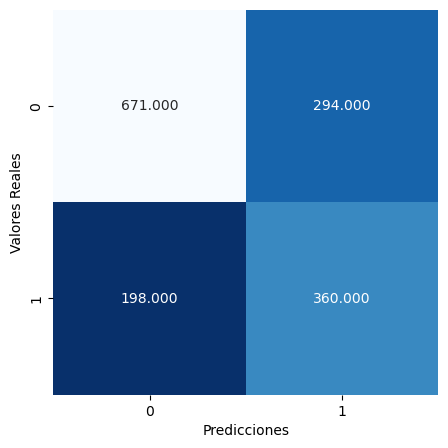

In [138]:
### Entrenamiento
bioinf_utils.matriz_confucion(pred_train, y_train)

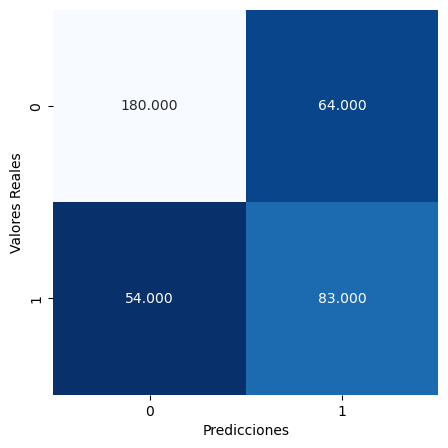

In [139]:
### Pruebas
bioinf_utils.matriz_confucion(pred_test, y_test)

### Precisión

$precision =  \frac{TP}{TP+FP} $

### Recall (Sensitividad)

$recall =  \frac{TP}{TP+FN} $

### F1 score

In [140]:
precision_train, sensitividad_train, f1_train = bioinf_utils.scores(pred_train, y_train, label="Entrenamiento")
precision_test, sensitividad_test, f1_test = bioinf_utils.scores(pred_test, y_test, label="Pruebas")

Entrenamiento | Precision: 55.05 % | Recall: 64.52% | f1 Score:59.41%
Pruebas | Precision: 56.46 % | Recall: 60.58% | f1 Score:58.45%


### ROC Curve

Comparemos como se compoarta el clasificador con los datos de Prueba

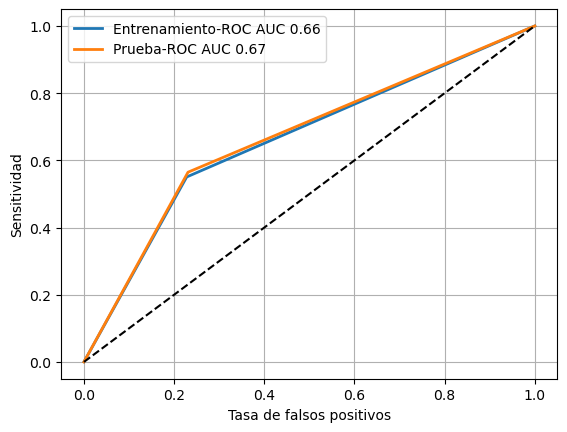

In [141]:
bioinf_utils.curva_roc(
    preds=[pred_train, pred_test],
    y=[y_train, y_test],
    labels=["Entrenamiento", "Prueba"]
)

## Modelo de Arbol

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Definicion del Modelo

[Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

>  **Pregunta Examen**: Vamos a realizar 3 experimentos, con tres valores diferentes del hiperparametro
- max_depth

> Debemos anotar en Markown los resultados de la funcion `scores`

In [178]:
modelo_arbol = DecisionTreeClassifier(
    max_depth= 3
    
)

In [179]:
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

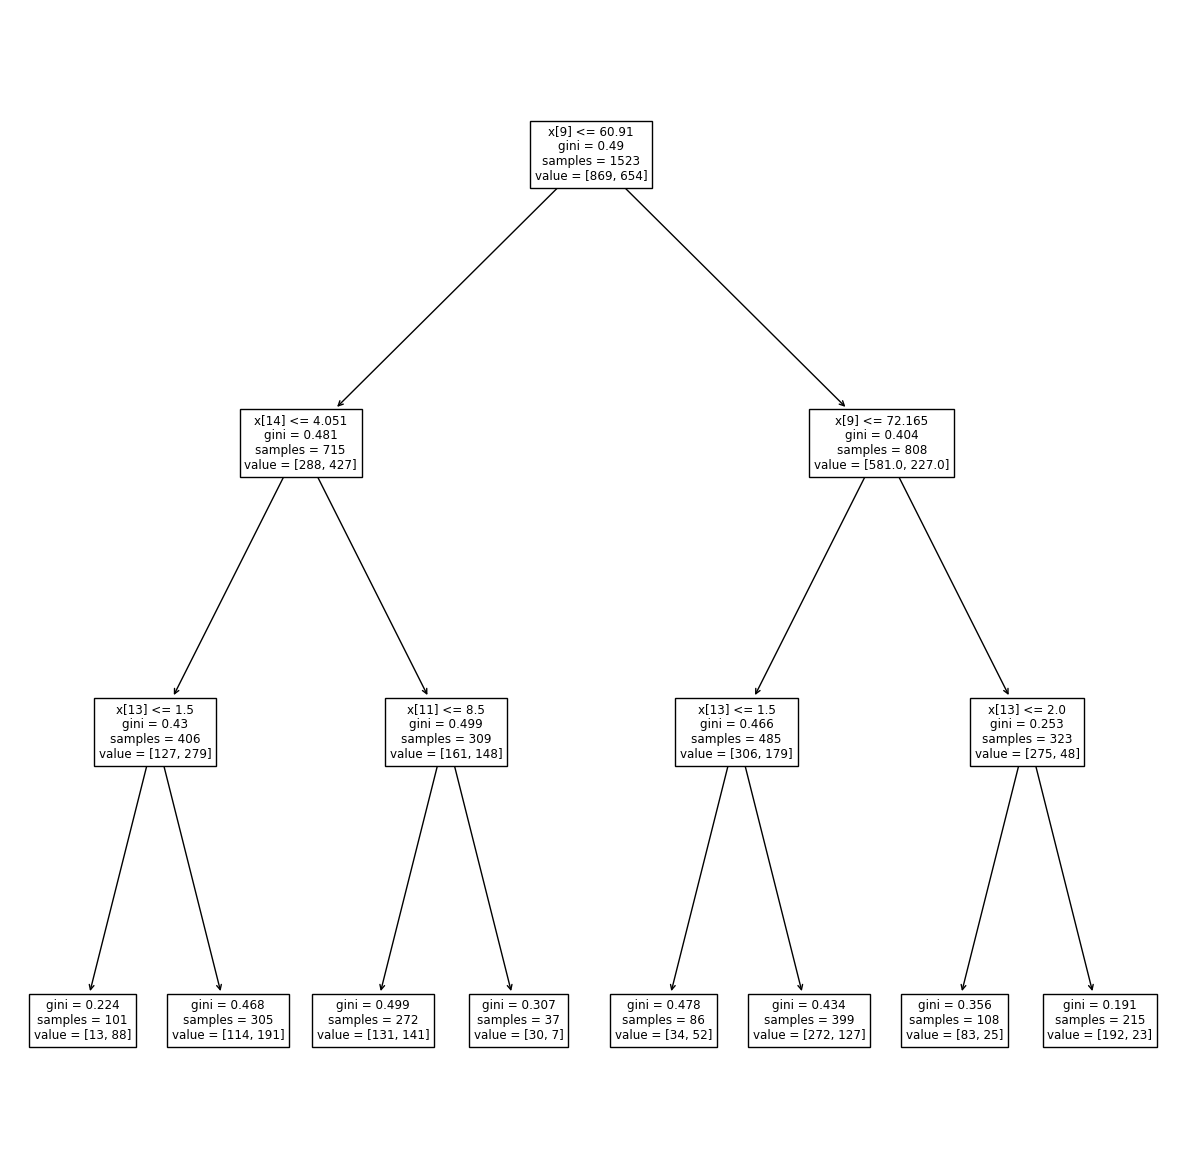

In [180]:
## Graficamos el arbol, tomemos en cuenta que si tiene mucha profundidad no lo podremos visualizar
plt.figure(figsize=(15,15))
tree.plot_tree(modelo_arbol)
plt.show()

In [181]:
## Entrenamiento
pred_train = modelo_arbol.predict(X_train)
## Pruebas
pred_test = modelo_arbol.predict(X_test)

### Evaluando el modelo

In [182]:
precision_train, sensitividad_train, f1_train = bioinf_utils.scores(pred_train, y_train, label="Entrenamiento")
precision_test, sensitividad_test, f1_test = bioinf_utils.scores(pred_test, y_test, label="Pruebas")

Entrenamiento | Precision: 72.17 % | Recall: 61.78% | f1 Score:66.57%
Pruebas | Precision: 65.99 % | Recall: 50.26% | f1 Score:57.06%


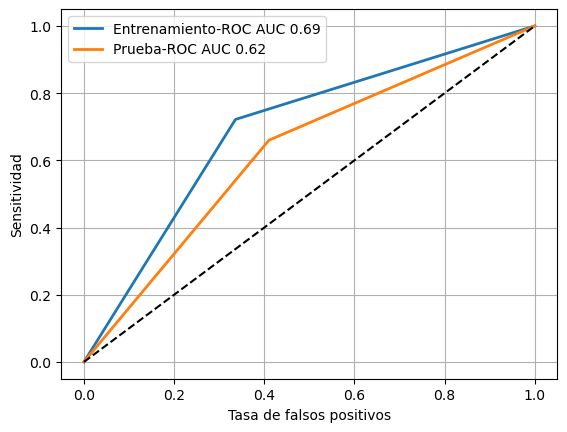

In [183]:
bioinf_utils.curva_roc(
    preds=[pred_train, pred_test],
    y=[y_train, y_test],
    labels=["Entrenamiento", "Prueba"]
)

## RESUTADOS AQUI

### Experimento 1 - max_depth =      **4** **resultado:** entrenamiento -ROC AUC 0.69;  Prueba-ROC AUC 0.63

### Experimento 2 - max_depth =      **5** **resultado:** entrenamiento -ROC AUC 0.72;  Prueba-ROC AUC 0.65

### Experimento 3 - max_depth=       **3** **resultado:** entrenamiento -ROC AUC 0.69;  Prueba-ROC AUC 0.62

> **Pregunta Examen**: Cual fue el mejor Modelo en los 3 experimentos??

### EL MODELO DE EXXPERIMENTO NUMERO 2 logro un 0.65 por lo que es el mejor modelo

# 1) PUNTOS EXTRA

## Red Neuronal

In [184]:
from sklearn.neural_network import MLPClassifier

In [185]:
X_train.shape

(1523, 17)

In [187]:
nn = MLPClassifier(
    solver='sgd', 
    alpha=1e-5,
    learning_rate='constant',
    learning_rate_init= 0.05,
    hidden_layer_sizes=(5,2), 
    random_state=1,
    max_iter = 2000,
    early_stopping=True,
    verbose=True
)

>  **Puntos Extra**: Explica los hiperparametros
> El hiperparámetro solver especifica el algoritmo de optimización utilizado para ajustar los pesos del modelo.
> 
> El hiperparámetro alpha controla la fuerza de la regularización L2 (también conocida como Ridge)
> 
> learning_rate especifica la estrategia de actualización de los pesos durante el entrenamiento
> 
> hidden_layer_sizes, eEste hiperparámetro define la arquitectura de la red neuronal
> 
> El hiperparámetro max_iter controla el número máximo de iteraciones durante el entrenamiento.
>
> early_stopping=True, el entrenamiento se detendrá si no se observa una mejora en la función de pérdida en el conjunto de validación.
>
> verbose=True, se mostrarán mensajes detallados durante el entrenamiento.
>
> estos hiperparámetros afectan la convergencia, la regularización y la arquitectura de la red neuronal en el modelo MLP.


In [188]:
nn.fit(X_train, y_train)

Iteration 1, loss = 0.67014406
Validation score: 0.588235
Iteration 2, loss = 0.67667491
Validation score: 0.607843
Iteration 3, loss = 0.66915616
Validation score: 0.601307
Iteration 4, loss = 0.64208712
Validation score: 0.633987
Iteration 5, loss = 0.64905665
Validation score: 0.627451
Iteration 6, loss = 0.64400986
Validation score: 0.633987
Iteration 7, loss = 0.63820996
Validation score: 0.581699
Iteration 8, loss = 0.67217765
Validation score: 0.699346
Iteration 9, loss = 0.63411268
Validation score: 0.627451
Iteration 10, loss = 0.63638697
Validation score: 0.601307
Iteration 11, loss = 0.66834065
Validation score: 0.647059
Iteration 12, loss = 0.65505346
Validation score: 0.653595
Iteration 13, loss = 0.63505892
Validation score: 0.640523
Iteration 14, loss = 0.65460717
Validation score: 0.633987
Iteration 15, loss = 0.64314605
Validation score: 0.712418
Iteration 16, loss = 0.64966748
Validation score: 0.686275
Iteration 17, loss = 0.64526843
Validation score: 0.594771
Iterat

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(5, 2),
              learning_rate_init=0.05, max_iter=2000, random_state=1,
              solver='sgd', verbose=True)

In [189]:
## Entrenamiento
pred_train = nn.predict(X_train)
## Pruebas
pred_test = nn.predict(X_test)

In [190]:
pred_train.shape

(1523,)

In [191]:
pred_test.shape

(381,)

In [192]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [193]:
fpr, tpr, tr = roc_curve(pred_train, y_train)

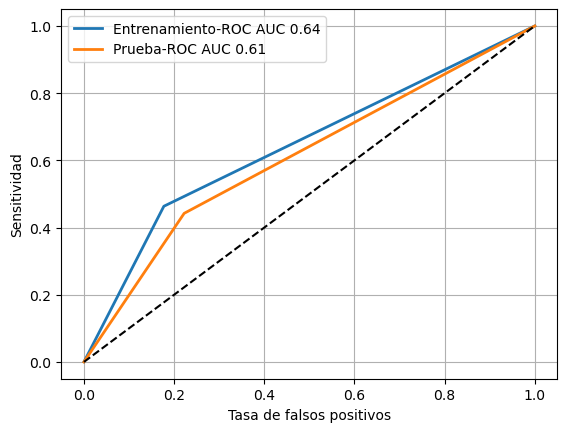

In [194]:
bioinf_utils.curva_roc(
    preds=[pred_train, pred_test],
    y=[y_train, y_test],
    labels=["Entrenamiento", "Prueba"]
)


# 2) PUNTOS EXTRA
- Crea una cuenta de GitHub
- Cea un repositorio y sube tu examen final
- Entrega tu examen enviandome el link de GitHub